In [1]:
import warnings
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from game import Game
from models import Player, Land, MockPlayer
from utils.fc import get_df_over_increase, create_mock_game, simulation, merge_dfs, get_diff, get_df_columns_mean, get_df_columns_sum
from utils.mpl import plot_scatter, plot_line_with_scatter

In [2]:
df = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,group=False)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='lyz', rarity='usual', group=False)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='lyz', rarity='unusual', group=False)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='lyz', rarity='rare', group=False)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='lyz', rarity='epic', group=False)
df = merge_dfs(dfs=[df, df1, df2, df3, df4], column='energy', pk='day', limits=(20,30))


# COMPARING ATTACKS BETWEEN RARITYS

In [3]:
df

,day,no_hero,usual,unusual,rare,epic
20,11.0,55.78,35.88,29.43,13.65,0.0
21,11.0,53.40,39.61,24.03,11.59,0.0
22,12.0,55.14,44.73,28.35,16.55,0.0
23,12.0,53.85,42.41,21.92,14.97,0.0
24,13.0,55.02,42.00,30.31,12.87,0.0
25,13.0,55.18,40.50,26.17,17.08,0.0
26,14.0,54.43,44.20,24.80,13.16,0.0
27,14.0,52.36,43.43,27.74,18.60,0.0
28,15.0,57.37,41.49,24.53,14.60,0.0
29,15.0,53.03,39.55,22.99,12.77,0.0


# TOTAL ENERGY AFTER 10 ATTACKS

In [4]:
df_sum = get_df_columns_sum(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_sum

,no_hero,usual,unusual,rare,epic
0,545.56,413.8,260.27,145.84,0.0


Text(0.5, 1.0, 'Total Energy Spent After 10 Attacks')

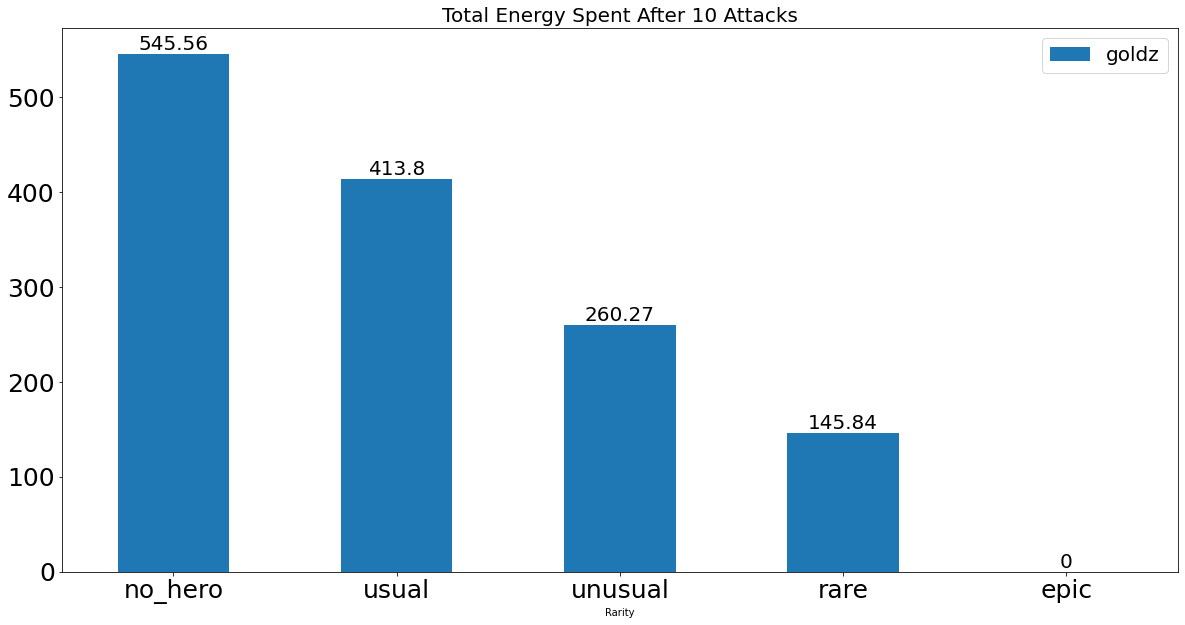

In [5]:
df_sum = pd.DataFrame({'heroes':df_sum.columns, 'goldz':df_sum.iloc[0].to_list()})

ax = df_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Total Energy Spent After 10 Attacks", fontsize=20)

# ENERGY AVERAGE ON EACH ATTACK

In [6]:
df_mean = get_df_columns_mean(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_mean

,no_hero,usual,unusual,rare,epic
0,54.556,41.38,26.027,14.584,0.0


Text(0.5, 1.0, 'Energy Average on Each attack')

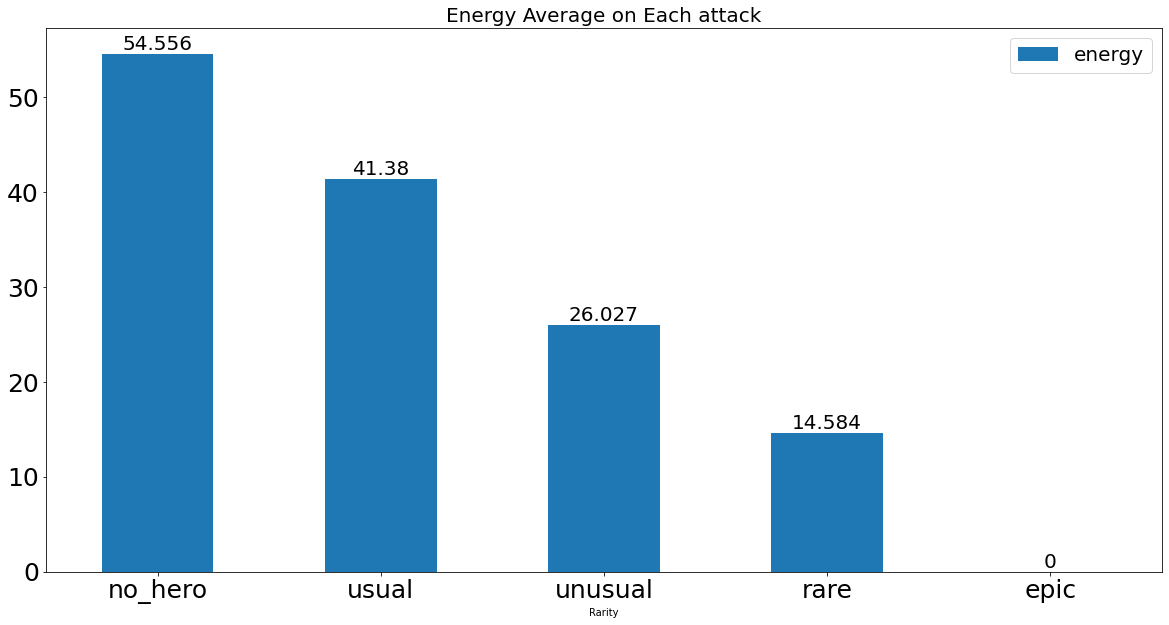

In [7]:

df_mean = pd.DataFrame({'heroes':df_mean.columns, 'energy':df_mean.iloc[0].to_list()})

ax = df_mean.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Energy Average on Each attack", fontsize=20)

# ENERGY DIFFERENCE COMPARED TO NO HERO

In [8]:
df = get_diff(df=df)
df

,day,usual,unusual,rare,epic
20,11.0,-19.90,-26.35,-42.13,-55.78
21,11.0,-13.79,-29.37,-41.81,-53.40
22,12.0,-10.41,-26.79,-38.59,-55.14
23,12.0,-11.44,-31.93,-38.88,-53.85
24,13.0,-13.02,-24.71,-42.15,-55.02
25,13.0,-14.68,-29.01,-38.10,-55.18
26,14.0,-10.23,-29.63,-41.27,-54.43
27,14.0,-8.93,-24.62,-33.76,-52.36
28,15.0,-15.88,-32.84,-42.77,-57.37
29,15.0,-13.48,-30.04,-40.26,-53.03


# TOTAL ENERGY SPENT COMPARED TO NO HERO

In [9]:
df_diff_sum = get_df_columns_sum(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_sum

,usual,unusual,rare,epic
0,-131.76,-285.29,-399.72,-545.56


Text(0.5, 1.0, 'Total Diff Energy Compared to No Hero')

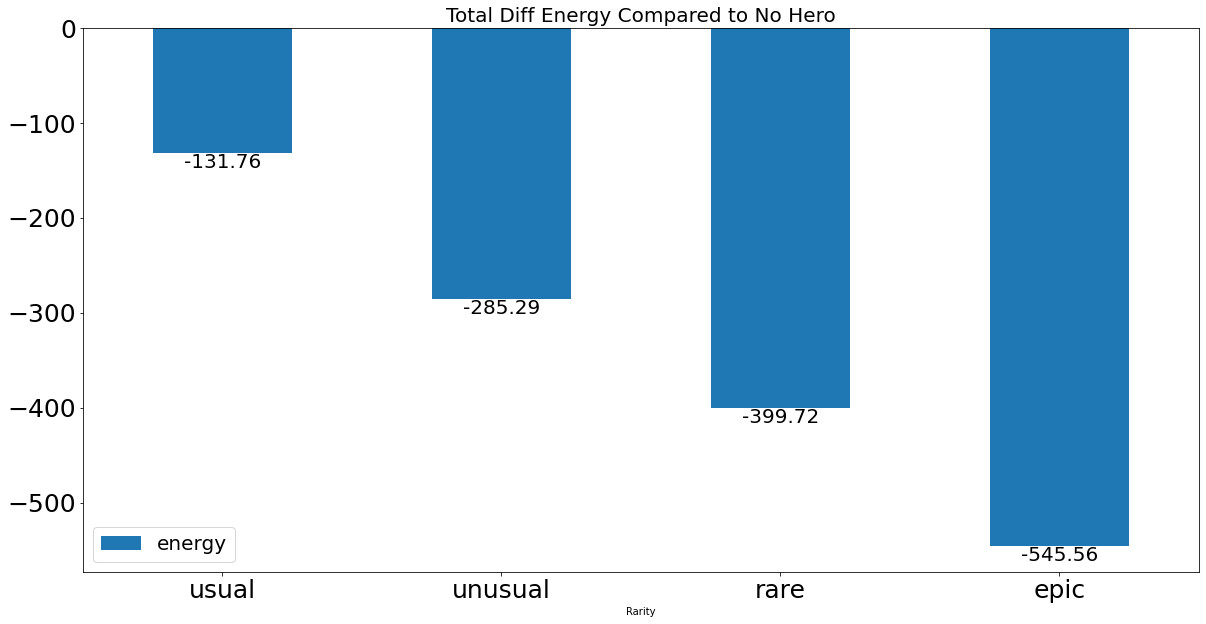

In [10]:
df_diff_sum = pd.DataFrame({'heroes':df_diff_sum.columns, 'energy':df_diff_sum.iloc[0].to_list()})

ax = df_diff_sum.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Total Diff Energy Compared to No Hero", fontsize=20)

# ENERGY DIFFERENCE SPENT PER ATTACK COMPARED TO NO HERO


In [11]:
df_diff_mean = get_df_columns_mean(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_mean

,usual,unusual,rare,epic
0,-13.176,-28.529,-39.972,-54.556


Text(0.5, 1.0, 'Diff Energy Average per Attack')

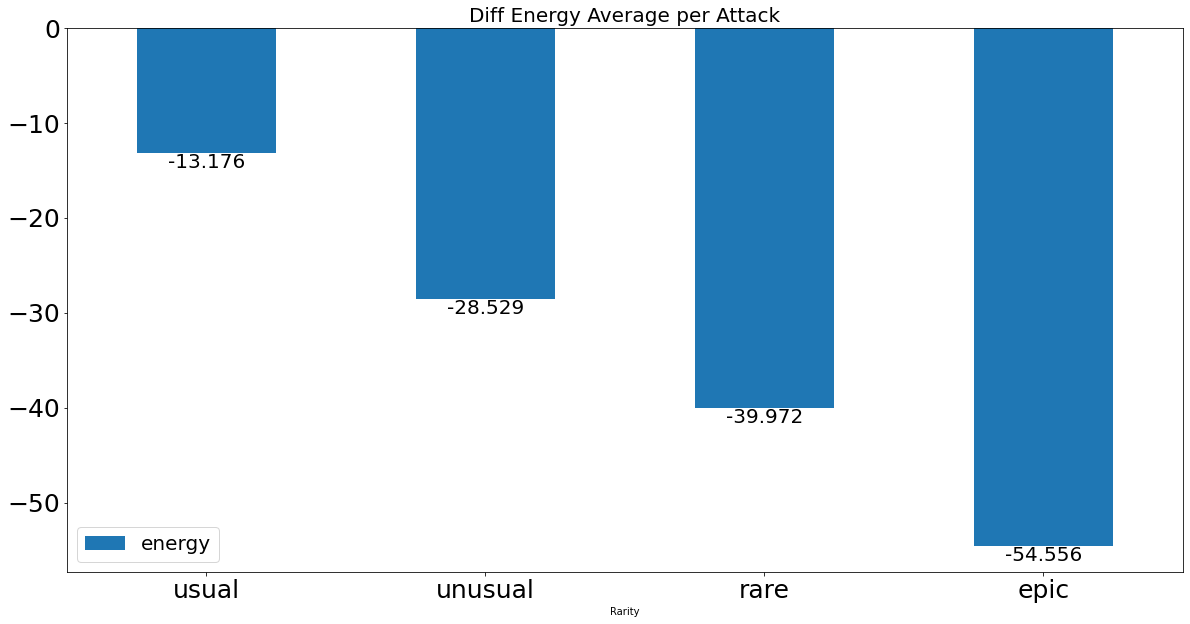

In [12]:
df_diff_mean = pd.DataFrame({'heroes':df_diff_mean.columns, 'energy':df_diff_mean.iloc[0].to_list()})

ax = df_diff_mean.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Diff Energy Average per Attack", fontsize=20)